In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

/home/hwixley/packages/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
ds_loc = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
ds = pd.read_csv(ds_loc)
ds

ds["revision_time"]
ds.describe

<bound method NDFrame.describe of     revision_time  exam_score
0           2.723      27.682
1           2.844      22.998
2           3.303      19.765
3           3.588      24.481
4           4.050      22.974
5           4.080      27.086
6           5.674      26.136
7           6.060      27.038
8           6.347      31.283
9           6.819      14.731
10          7.098      28.946
11          7.515      26.901
12          8.356      35.299
13          9.214      24.228
14         10.364      34.651
15         10.510      34.667
16         12.102      34.848
17         13.187      37.266
18         16.692      43.491
19         16.977      45.201
20         18.330      40.924
21         19.599      48.321
22         20.321      49.574
23         21.280      47.239
24         21.578      45.582
25         21.798      53.182
26         22.048      39.956
27         24.949      52.697
28         25.147      54.900
29         26.495      66.065
30         26.535      60.068
31    

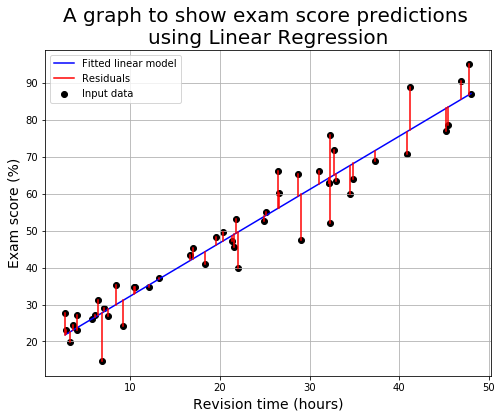

30.985472614541305

In [3]:
#QUESTIONS 1b & 1c

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import numpy as np

X = ds["revision_time"].values.reshape(-1,1)

Y = ds["exam_score"]


#Y.shape
model = sklearn.linear_model.LinearRegression(fit_intercept=True)

#model.fit(X,Y)
#y_pred = model.predict(X)

w = np.zeros((50,2))
for k in range(50):
    w[k,0] = Y[k]/1
    w[k,1] = Y[k]/X[k]

#newX = np.ones((50,2))
#newX[:,1] = X

model.fit(X,Y)
y_pred = model.predict(X)

#mean_squared_error(Y,y_pred)
#mean_absolute_error(Y,y_pred)
plt.figure(figsize=(8,6))
plt.grid(True)
plt.scatter(X,Y, color='black', label='Input data')
plt.plot(X,y_pred, color = 'blue', label='Fitted linear model')

for j in range(50):
    
    x1 = np.ones(2,)*X[j]
    y = np.ones(2,)
    y[0] = Y[j]
    y[1] = y_pred[j]
    if j == 49:
        plt.plot(x1,y,color='red', label = 'Residuals')
    else:
        plt.plot(x1,y,color='red')

plt.xlabel('Revision time (hours)', size =14)
plt.ylabel('Exam score (%)', size =  14)
plt.title('A graph to show exam score predictions \nusing Linear Regression', size = 20)
plt.legend(loc="upper left")
plt.show()

mseSklearn = sm.mean_squared_error(Y,y_pred)
mseSklearn

In [4]:
#QUESTION 1d

import numpy as np
import sklearn.metrics as sm

W = np.ones((2,1))

X = np.ones((ds["revision_time"].size, 2))
X[:,1] = np.array(ds["revision_time"])

Y = np.matrix(ds["exam_score"]).reshape(-1,1)

phi = X


pseudoInversePhi = np.matmul(np.matrix(np.matmul(phi.transpose(), phi)).I, phi.transpose())

w_hat = np.matmul(pseudoInversePhi, Y)

print(w_hat)

[[17.89768026]
 [ 1.44114091]]


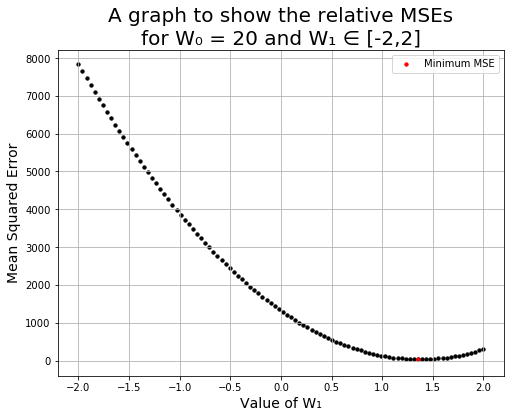

32.48096161535148


1.3535353535353538

In [5]:
#Question 1g

w1 = np.linspace(-2,2,100)
mseS = np.zeros((100))

for i in range(100):
    w = np.array([[20],[w1[i]]])
    y_pred = np.matmul(X,w)
    
    mseS[i] = sm.mean_squared_error(Y,y_pred)

minIndex = mseS.argmin()
    
plt.figure(figsize=(8,6))
plt.grid(True)
plt.scatter(w1,mseS, color='black', s=11)#, label='Normal data points')
plt.scatter(w1[minIndex], mseS[minIndex], c = 'red', s=11, label='Minimum MSE')

plt.xlabel('Value of W₁', size =14)
plt.ylabel('Mean Squared Error', size =  14)
plt.title('A graph to show the relative MSEs\nfor W₀ = 20 and W₁ ∈ [-2,2]', size = 20)
plt.legend(loc="upper right")
plt.show()

print(mseS[minIndex])
w1[minIndex]

Text(0.5,0.98,'Graphs to show exam score predictions using\npolynomial regression models of different degree')

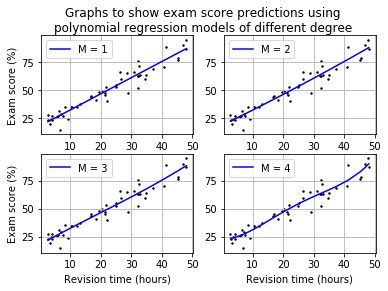

In [6]:
#QUESTION 2a

from sklearn.linear_model import LinearRegression
Y = ds["exam_score"]
x = ds["revision_time"]
X1 = np.ones((50,1))
X2 = np.ones((50,2))
X3 = np.ones((50,3))
X4 = np.ones((50,4))

X1[:,0] = x
X2[:,0] = x
X2[:,1] = x*x
X3[:,0] = x
X3[:,1] = x*x
X3[:,2] = x*x*x
X4[:,0] = x
X4[:,1] = x*x
X4[:,2] = x*x*x
X4[:,3] = x*x*x*x

model = sklearn.linear_model.LinearRegression(fit_intercept=True)
model.fit(X1,Y)
yp1 = model.predict(X1)

fig, axs = plt.subplots(2, 2)

axs[0,0].scatter(X1,Y, c='black', s= 2, label = '')
p1 =axs[0,0].plot(X1,yp1, c='blue', label='M = 1')
axs[0,0].legend(loc ="upper left")
axs[0,0].set(xlabel = 'Revision time (hours)', ylabel = 'Exam score (%)')
axs[0,0].grid()

model.fit(X2,Y)
yp2 = model.predict(X2)
axs[0,1].scatter(X1,Y, c='black', s= 2, label = '')
axs[0,1].plot(X1,yp2, c='blue', label='M = 2')
axs[0,1].legend(loc ="upper left")
axs[0,1].grid()

model.fit(X3,Y)
yp3 = model.predict(X3)
axs[1,0].scatter(X1,Y, c='black', s= 2, label = '')
axs[1,0].plot(X1,yp3, c='blue', label='M = 3')
axs[1,0].legend(loc ="upper left")
axs[1,0].set(xlabel = 'Revision time (hours)', ylabel = 'Exam score (%)')
axs[1,0].grid()

model.fit(X4,Y)
yp4 = model.predict(X4)
axs[1,1].scatter(X1,Y, c='black', s= 2, label = '')
axs[1,1].plot(X1,yp4, c='blue', label='M = 4')
axs[1,1].legend(loc ="upper left")
axs[1,1].set(xlabel = 'Revision time (hours)')
axs[1,1].grid()

fig.suptitle('Graphs to show exam score predictions using\npolynomial regression models of different degree')

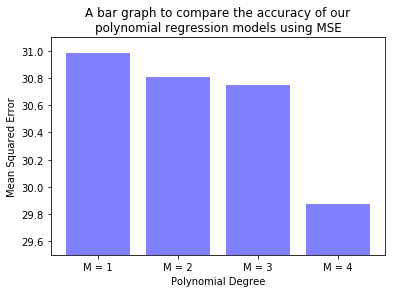

In [7]:
#QUESTION 2b

objects = ('M = 1','M = 2','M = 3','M = 4')
y_pos = np.arange(len(objects))

mse1 = sm.mean_squared_error(Y,yp1)
mse2 = sm.mean_squared_error(Y,yp2)
mse3 = sm.mean_squared_error(Y,yp3)
mse4 = sm.mean_squared_error(Y,yp4)
performance = [mse1,mse2,mse3,mse4]

plt.bar(y_pos, performance,color='blue', align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Squared Error')
plt.xlabel('Polynomial Degree')
plt.title('A bar graph to compare the accuracy of our\npolynomial regression models using MSE')
plt.ylim(29.5,31.1)

plt.show()

In [8]:
#QUESTION 2c

mse3-mse4

0.8713715270004023